# **Internship - Task 4 (Fraud Detection System)**
# **DevelopersHub Corporation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from IPython import get_ipython
from IPython.display import display

In [3]:
df = pd.read_csv('fraud_data.csv')

In [4]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [5]:
df.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0
14445,22-01-2019 00:55,Daugherty-Thompson,food_dining,50.09,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,65e7370f473f9b9d75796c8033a7c929,40.387243,-92.224871,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [7]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [8]:
df.columns.unique()

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
df.shape

(14446, 15)

In [10]:
df.isnull()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14442,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14443,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
city,0
state,0
lat,0
long,0
city_pop,0
job,0


In [12]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14441,False
14442,False
14443,False
14444,False


In [13]:
df.duplicated().sum()

np.int64(63)

In [14]:
# Target Variable Analysis
fraud_counts = df['is_fraud'].value_counts()
print(fraud_counts)
fraud_percentage = (fraud_counts[1] / len(df)) * 100

is_fraud
0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64


<ipython-input-14-2b25d050180a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fraud_percentage = (fraud_counts[1] / len(df)) * 100


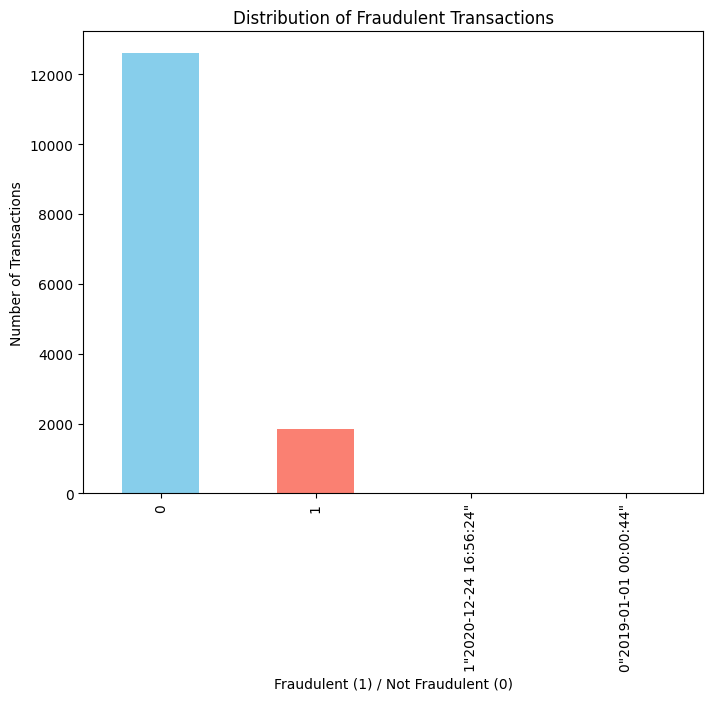

In [15]:
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.ylabel('Number of Transactions')
plt.show()

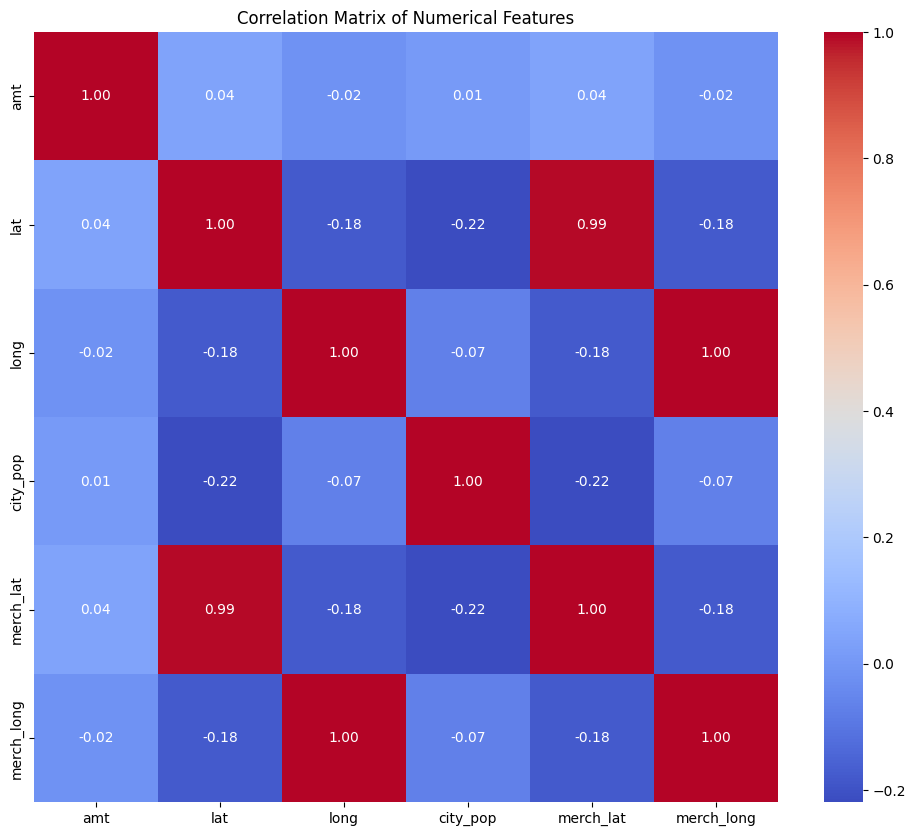

In [16]:
# Correlation Analysis
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Text(0.5, 1.0, 'Distribution of Latitude')

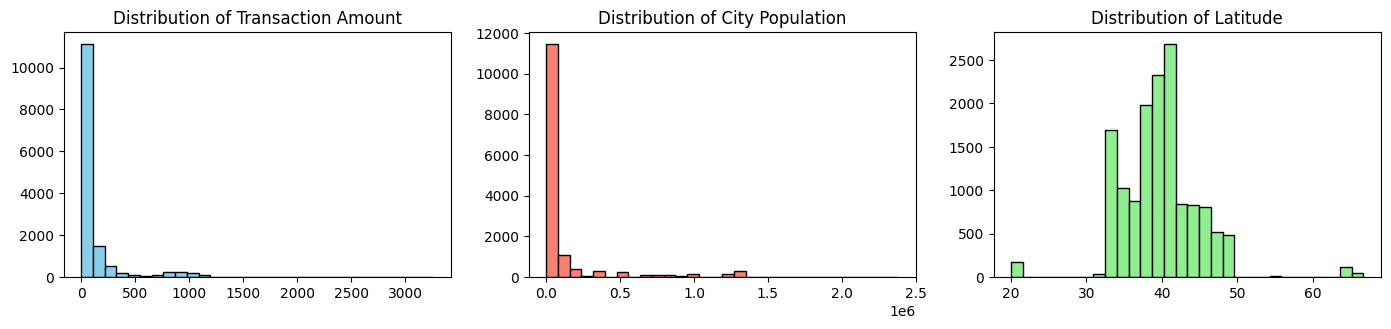

In [17]:
# Numerical Features
plt.figure(figsize=(17, 7))

plt.subplot(2, 3, 1)
plt.hist(df['amt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amount')

plt.subplot(2, 3, 2)
plt.hist(df['city_pop'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of City Population')

plt.subplot(2, 3, 3)
plt.hist(df['lat'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Latitude')

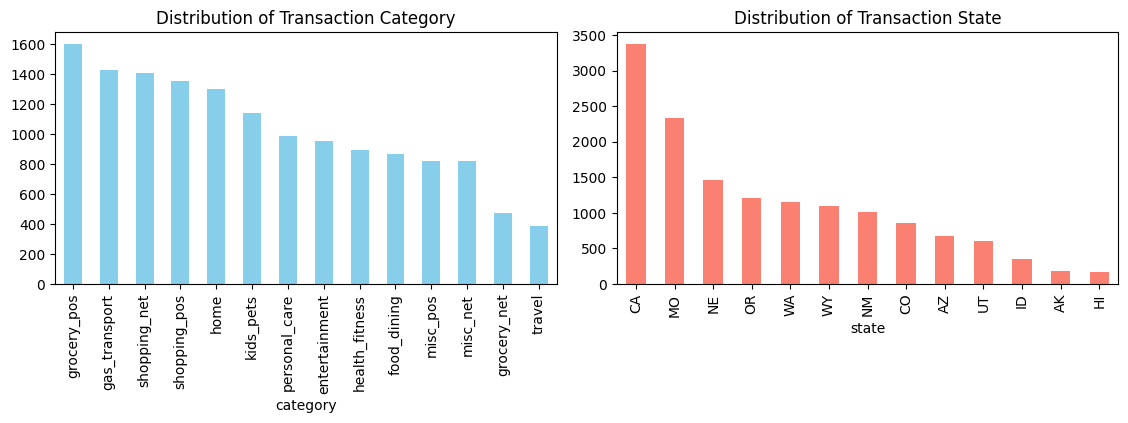

In [18]:
# Categorical Features
plt.figure(figsize=(17, 7))

plt.subplot(2, 3, 4)
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Transaction Category')

plt.subplot(2, 3, 5)
df['state'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Transaction State')

plt.tight_layout()
plt.show()

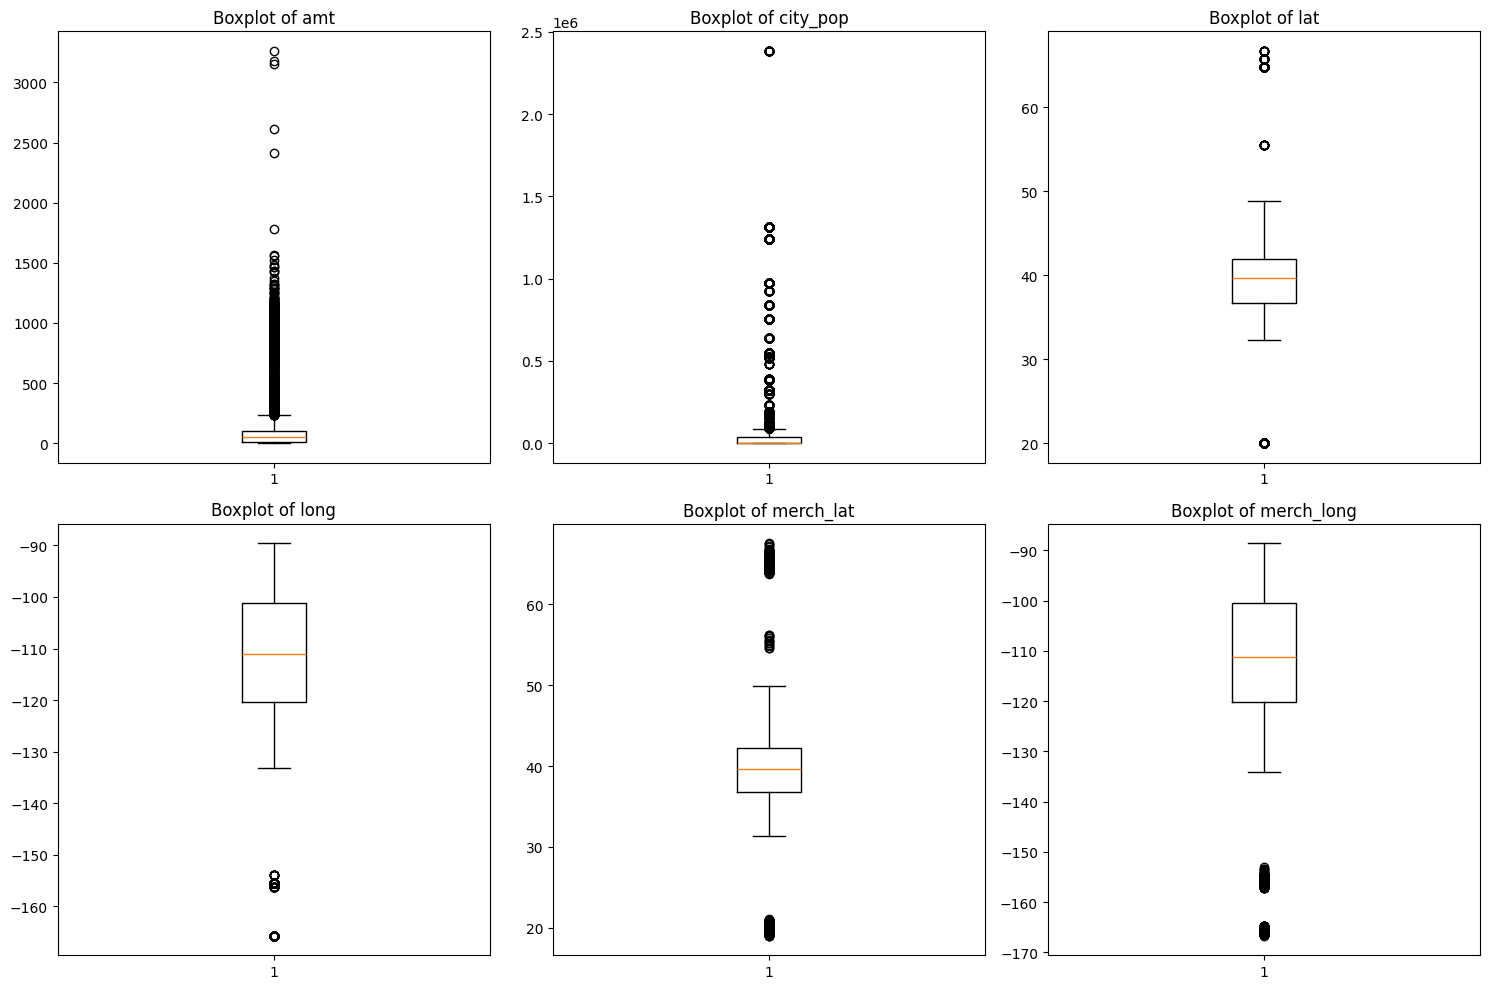

In [19]:
# Analyze numerical features for outliers
numerical_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [20]:
# IQR method for outlier handling
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [21]:
# Identify rows with problematic labels
problematic_labels = ['1"2020-12-24 16:56:24"', '0"2019-01-01 00:00:44"']
rows_to_remove = df[df['is_fraud'].isin(problematic_labels)].index
df_cleaned = df.drop(rows_to_remove)

In [22]:
# Define features (X) and target (y) after cleaning the data
X = df_cleaned.drop('is_fraud', axis=1)
y = df_cleaned['is_fraud']

In [23]:
# Drop datetime columns
X = X.drop(['trans_date_trans_time', 'dob'], axis=1)

# One-hot encode categorical features
categorical_cols = ['merchant', 'category', 'city', 'state', 'job']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Extract numerical features
numerical_cols = X.select_dtypes(include=np.number).columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Identify problematic columns
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Column '{col}' has non-numeric values.")
        print(X[col].unique()[:10])  # Display some unique values

# Drop the column 'trans_num', which contains string values.
X = X.drop('trans_num', axis=1)

# Extract numerical features again
numerical_cols = X.select_dtypes(include=np.number).columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Column 'trans_num' has non-numeric values.
['436937887b481bbb237956bb4e592193' '82a79798b2e4c690d1e3c9526e8ae0ed'
 'a9ddd0c259a7b053ebb6e36042364002' '7fbc05c677c102b36030efa2394f0d71'
 '31001f18f1cc19cfde92209361884e06' 'f3d6f1020342e0aec86a1483d85a52d4'
 '73d976fc46f089af2c58c39273525b55' '4f7bdd079103fb386ebe90b1fd22fd7b'
 'ce3b2734ce646ef6a47b3484a8e043e5' '2df9fa2d0e508ed2a83aa3ac6f4b5d5a']


In [25]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [26]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [27]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.81      0.35      0.49        71

    accuracy                           0.97      2006
   macro avg       0.89      0.67      0.74      2006
weighted avg       0.97      0.97      0.97      2006

Accuracy: 0.9740777666999003


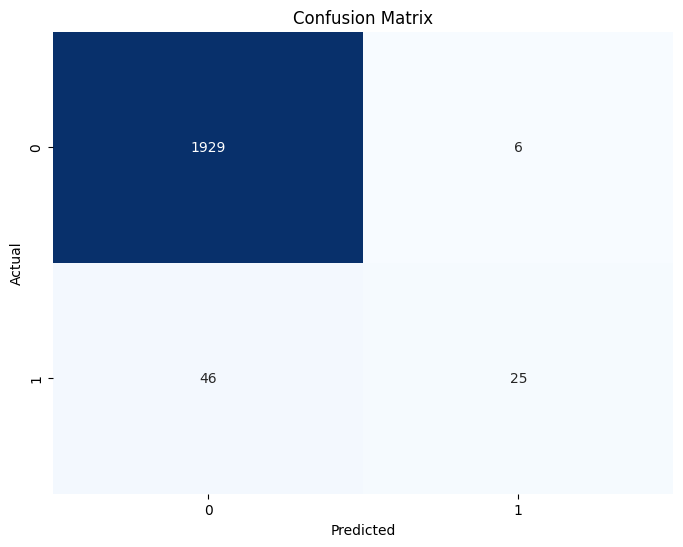

In [28]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Global feature list
numerical_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

def load_and_preprocess_data(data_path):
    df = pd.read_csv(data_path)

    # Clean corrupted 'is_fraud' column
    df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').astype(int)

    # Select only numerical features + label
    df = df[numerical_cols + ['is_fraud']]

    # Handle outliers using IQR
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    X = df[numerical_cols]
    y = df['is_fraud']
    return X, y

def train_model(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    return model

def predict_fraud(model, input_data, scaler):
    # Create input DataFrame with correct feature names
    input_df = pd.DataFrame([input_data], columns=numerical_cols)
    input_scaled = scaler.transform(input_df)
    input_scaled_df = pd.DataFrame(input_scaled, columns=numerical_cols)

    prediction = model.predict(input_scaled_df)
    return prediction[0]

def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    print("\nModel Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

if __name__ == "__main__":
    data_path = 'fraud_data.csv'
    X, y = load_and_preprocess_data(data_path)

    try:
        model = joblib.load('fraud_detection_model.pkl')
        scaler = joblib.load('fraud_detection_scaler.pkl')
        print("Loaded existing model and scaler.")
    except FileNotFoundError:
        print("Training model...")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=numerical_cols)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=numerical_cols)

        model = train_model(X_train_scaled, y_train)

        joblib.dump(model, 'fraud_detection_model.pkl')
        joblib.dump(scaler, 'fraud_detection_scaler.pkl')
        print("Model and scaler saved.")

        evaluate_model(model, X_test_scaled, y_test)

    # Manual input loop
    while True:
        print("\nEnter transaction details:")
        try:
            user_input = input("amt, city_pop, lat, long, merch_lat, merch_long:\n")
            input_data = [float(x.strip()) for x in user_input.split(',')]
            if len(input_data) != len(numerical_cols):
                raise ValueError(f"Expected {len(numerical_cols)} values.")
            prediction = predict_fraud(model, input_data, scaler)
            print("Prediction:", "FRAUD" if prediction == 1 else "NOT FRAUD")
        except Exception as e:
            print("Error:", e)

        cont = input("Test another transaction? (y/n): ")
        if cont.lower() != 'y':
            break

Loaded existing model and scaler.

Enter transaction details:
